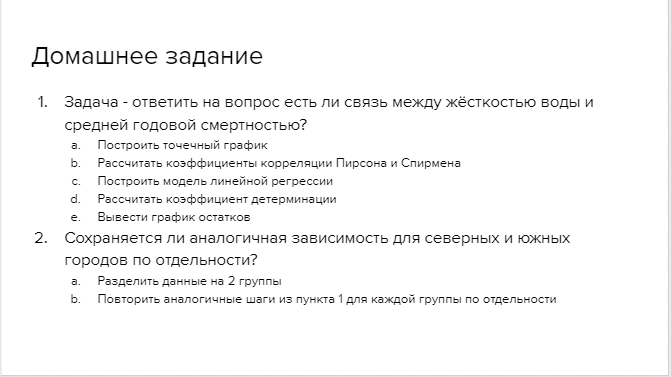

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('water.csv')

In [3]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


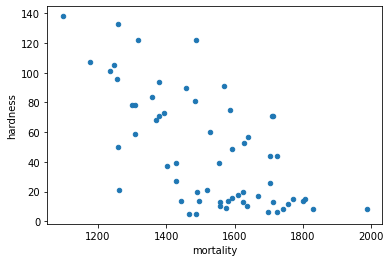

In [4]:
data.plot(kind='scatter', x='mortality', y='hardness')

In [5]:
#Коэфф корреляции по Пирсону
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
#Коэфф корреляции по Спирману
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = data[['mortality']]
y = data['hardness']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_


array([-0.12670202])

In [12]:
model.intercept_

239.3678426140957

In [14]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [16]:
#Коэфф Детерминации
model.score(X_test, y_test)

0.4948982822876836

Качество модели оставляет желать лучшего)

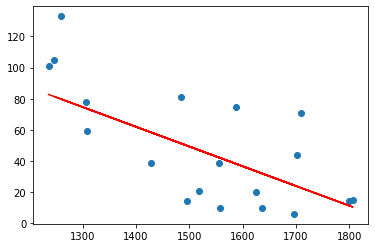

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

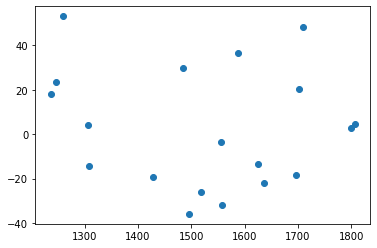

In [18]:
plt.scatter(X_test, (y_test - y_pred))

Остатки распределены хаотично

In [19]:
data = pd.read_csv('water.csv')

Посмотрим в разбивке по регионам

In [23]:
south = data.loc[data.location == 'South']
south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [34]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [35]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Видим что есть некоторая обратная зависимость. Получается что чем вы плотность воды тем ниже смертность

In [24]:
X = south[['mortality']]
y = south['hardness']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.coef_

array([-0.18112812])

In [28]:
model.intercept_

324.1190746235987

In [29]:
y_pred = model.predict(X_test)
y_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [30]:
#Коэфф Детерминации
model.score(X_test, y_test)

-0.052266157944838465

Всё, очень плохо)) Качество модели стремится к 0.

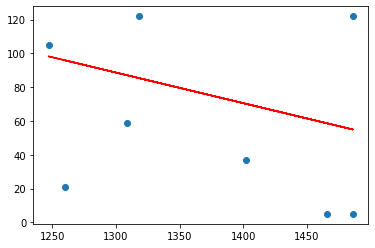

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

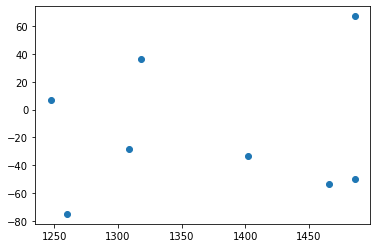

In [32]:
plt.scatter(X_test, (y_test - y_pred))

Для южных регионов остатки распределены довольно хаотично

In [36]:
data = pd.read_csv('water.csv')

In [40]:
north = data.loc[data.location == 'North']
north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


In [41]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [42]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Видим довольно слабую обратную зависимость

In [43]:
X = south[['mortality']]
y = south['hardness']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.coef_

array([-0.18112812])

In [47]:
model.intercept_

324.1190746235987

In [48]:
y_pred = model.predict(X_test)
y_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [49]:
#Коэфф Детерминации
model.score(X_test, y_test)

-0.052266157944838465

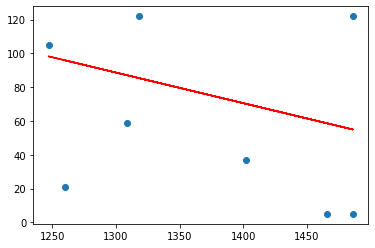

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Низкое качество модели, ничего толком не говорит.

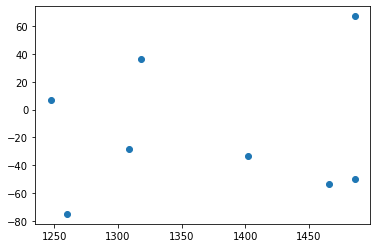

In [51]:
plt.scatter(X_test, (y_test - y_pred))

Большая часть остатков находится ниже 0, прослеживается некоторый паттерн

Единственное что мы выяснили, что смертность обратно зависима с плотностью воды. 
Т.е. наименьшую плотность имеет дистилированная вода, наибольшую вода с примесью солей. Дистилированная вода вымывает соли и микроэлемеенты из организма, не привнося ничего